# <font color=red><center>Mini Projet : D√©tection de d√©pression dans les tweets

## <font color=blue><center> R√©alis√© par : OUMHARCH Fadwa  &  BOURACHED Douha

### <font color=black>Introduction:

De nos jours, les gens utilisent les m√©dias sociaux pour exprimer leurs sentiments et partager leurs pens√©es et leurs d√©sirs les plus intimes. Plus important encore, tout cela se fait de mani√®re naturaliste, ce qui nous donne l'occasion de surmonter le probl√®me de manipulation abord√© dans les questionnaires sur la d√©pression autod√©clar√©e. Ainsi, cela nous permet de capturer ces pens√©es dans leur forme la plus brute et de les utiliser pour identifier les l'√©tat d'esprit actuel de l'√©diteur, qui peut √™tre utilis√©, √† l'aide de techniques d'analyse des sentiments, pour d√©tecter la d√©pression clinique. La d√©pression est une maladie courante dans le monde, avec plus de 264 millions de personnes touch√©es. La d√©pression est diff√©rente des fluctuations habituelles de l'humeur et des r√©actions √©motionnelles de courte dur√©e aux d√©fis de la vie quotidienne. Surtout lorsqu'elle est de longue dur√©e et d'intensit√© mod√©r√©e ou s√©v√®re, la d√©pression peut devenir un probl√®me de sant√© grave. Le lien entre l'utilisation des m√©dias sociaux et la d√©pression est document√© depuis longtemps, certaines √©tudes ayant r√©v√©l√© qu'une utilisation excessive des m√©dias sociaux peut contribuer √† l'apparition de la d√©pression, et d'autres remarquant que les personnes d√©prim√©es publient sur leur d√©pression sur les r√©seaux sociaux.


### importer des biblioth√®ques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split


### Lire l'ensemble de donn√©e

In [2]:
data = pd.read_csv("depression.csv")

In [3]:
# Check the data
data.head(10)

Unnamed: 0                                            message  label
0         106  just had a real good moment. i missssssssss hi...      0
1         217         is reading manga  http://plurk.com/p/mzp1e      0
2         220  @comeagainjen http://twitpic.com/2y2lx - http:...      0
3         288  @lapcat Need to send 'em to my accountant tomo...      0
4         540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
5         624              so sleepy. good times tonight though       0
6         701  @SilkCharm re: #nbn as someone already said, d...      0
7         808                 23 or 24√Ø¬ø¬ΩC possible today. Nice       0
8        1193        nite twitterville  workout in the am  -ciao      0
9        1324    @daNanner Night, darlin'!  Sweet dreams to you       0

###  Nettoyage et pr√©paration des donn√©es

#### Suppression de colonne : "Unnamed: 0"

In [4]:
#Removing the Unnamed: 0 (we will only use the message)
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.head()

message  label
0  just had a real good moment. i missssssssss hi...      0
1         is reading manga  http://plurk.com/p/mzp1e      0
2  @comeagainjen http://twitpic.com/2y2lx - http:...      0
3  @lapcat Need to send 'em to my accountant tomo...      0
4      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0

#### Convertir en minuscule

In [5]:
#¬†Convert to lowercase

data['message'] = data['message'].apply(lambda x: x.lower())


#### Supprimer la ponctuation

In [6]:
# Remove punctuation

import string

def punctuation_removal(message):
    all_list = [char for char in message if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['message'] = data['message'].apply(punctuation_removal)

### Suppression des mots vides

In [7]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['message'] = data['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
data.head()

message  label
0                 real good moment missssssssss much      0
1                   reading manga httpplurkcompmzp1e      0
2  comeagainjen httptwitpiccom2y2lx httpwwwyoutub...      0
3  lapcat need send em accountant tomorrow oddly ...      0
4                  add myspace myspacecomlookthunder      0

### Exploration de donn√©es de base

label
0    8000
1    2314
Name: message, dtype: int64


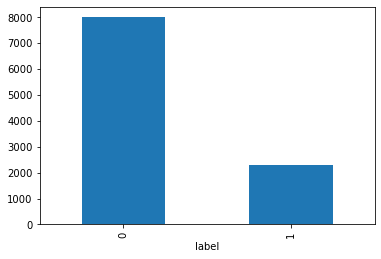

In [9]:
# How many depressed '1' and not depressed '0' ?
print(data.groupby(['label'])['message'].count())
data.groupby(['label'])['message'].count().plot(kind="bar")
plt.show()

### Analyse Wordcloud

#### Nuage de mot pour les gens qui sont pas d√©prim√©

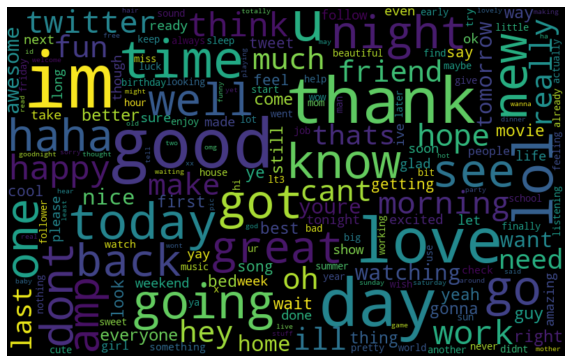

In [10]:
# Word cloud for not Depressed
from wordcloud import WordCloud

sentiment_data = data[data["label"] == 0]
all_words = ' '.join([message for message in sentiment_data.message])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Nuage de mot pour les gens qui sont d√©prim√©

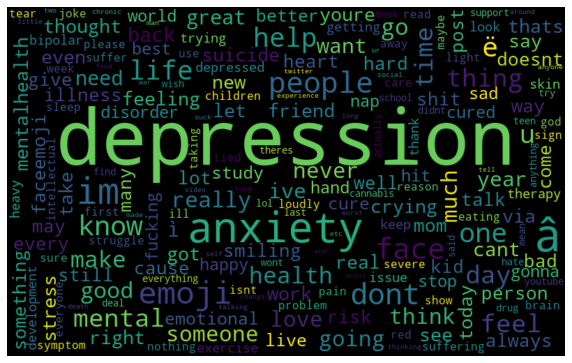

In [11]:
# Depression Tweets
from wordcloud import WordCloud

depression_data = data[data["label"] == 1]
all_words = ' '.join([message for message in depression_data.message])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Compteur de mots les plus fr√©quents

In [12]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(message, column_text, quantity):
    all_words = ' '.join([message for message in message[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

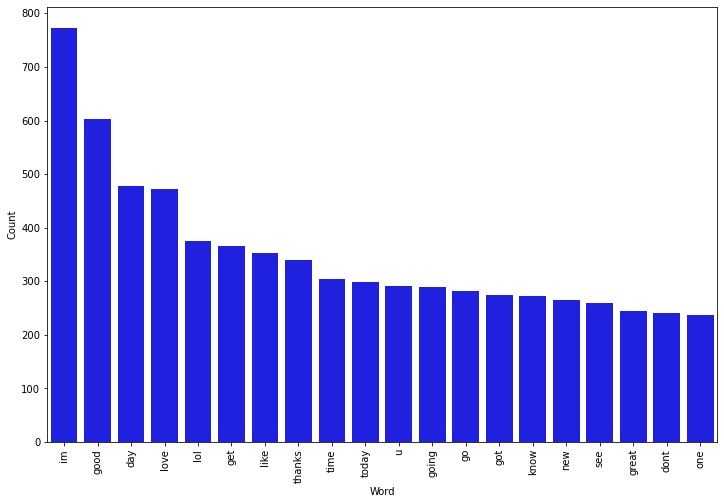

In [13]:
#¬†Most frequent words not Depressed
counter(data[data["label"] == 0], "message", 20)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)


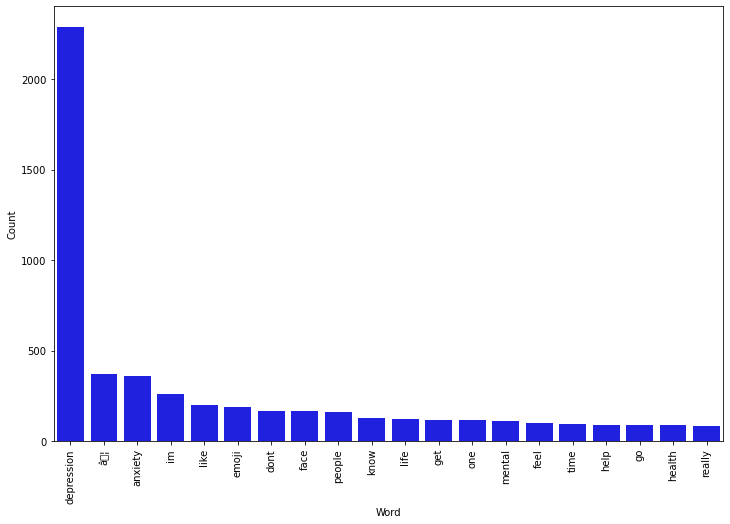

In [14]:
#¬†Most frequent words in Depressed
counter(data[data["label"] == 1], "message", 20)

# La mod√©lisation

#### D√©finir la variable d√©pendante et ind√©pendante comme x et y

In [15]:
x = data["message"]
y = data["label"]

#### Diviser l'ensemble de donn√©es en ensemble d'entrainement et en ensemble de test

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convertir du texte en vecteurs

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### <font color=blue> 1. R√©gression logistique

La r√©gression logistique est une m√©thode de classification lin√©aire qui apprend la probabilit√© qu'un √©chantillon appartienne √† une certaine classe. La r√©gression logistique tente de trouver la fronti√®re de d√©cision optimale qui s√©pare le mieux les classes.

Compte tenu du m√©canisme d'apprentissage, la r√©gression logistique est un mod√®le discriminatif, ce qui signifie qu'il mod√©lise directement la probabilit√© a posteriori de ùëÉ(ùë¶|ùë•) en apprenant le mappage entr√©e-sortie en minimisant l'erreur.

La r√©gression logistique divise l'espace des caract√©ristiques de mani√®re lin√©aire et fonctionne g√©n√©ralement raisonnablement bien m√™me lorsque certaines des variables sont corr√©l√©es.

Dans notre donn√©es , la r√©gression logistique a atteint une pr√©cisions de classification de 98%.


In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)


LogisticRegression()

In [21]:
pred_lr=LR.predict(xv_test)

In [22]:
LR.score(xv_test, y_test)

0.9844901124466847

### <font color=blue> 2. L'arbre de d√©cision

Un arbre de d√©cision est un outil d'aide √† la d√©cision repr√©sentant un ensemble de choix sous la forme graphique d'un arbre. Les diff√©rentes d√©cisions possibles sont situ√©es aux extr√©mit√©s des branches, et sont atteintes en fonction de d√©cisions prises √† chaque √©tape. L‚Äôapprentissage par arbre de d√©cision d√©signe une m√©thode bas√©e sur l'utilisation d'un arbre de d√©cision comme mod√®le pr√©dictif. On l'utilise notamment en fouille de donn√©es et en apprentissage automatique.

Dans ces structures d'arbre, les feuilles repr√©sentent les valeurs de la variable-cible et les embranchements correspondent √† des combinaisons de variables d'entr√©e qui m√®nent √† ces valeurs. En analyse de d√©cision, un arbre de d√©cision peut √™tre utilis√© pour repr√©senter de mani√®re explicite les d√©cisions r√©alis√©es et les processus qui les am√®nent. En apprentissage et en fouille de donn√©es, un arbre de d√©cision d√©crit les donn√©es mais pas les d√©cisions elles-m√™mes, l'arbre serait utilis√© comme point de d√©part au processus de d√©cision.

C'est une technique d'apprentissage supervis√© : on utilise un ensemble de donn√©es pour lesquelles on conna√Æt la valeur de la variable-cible afin de construire l'arbre (donn√©es dites √©tiquet√©es), puis on extrapole les r√©sultats √† l'ensemble des donn√©es de test. Les arbres de d√©cision font partie des algorithmes les plus populaires en apprentissage automatique.
Dans notre mini projet , la r√©gression logistique a atteint une pr√©cisions de classification de 92%.


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [25]:
pred_dt = DT.predict(xv_test)

In [26]:
DT.score(xv_test, y_test)

0.9914695618456766

### <font color=blue> 3. Gradient Boosting Classifier

Le renforcement du gradient est un type de boosting d'apprentissage de la machine. Il repose fortement sur la pr√©diction que le prochain mod√®le r√©duira les erreurs de pr√©diction lorsqu'il sera m√©lang√© avec les pr√©c√©dents.Le renforcement du gradient est une technique populaire parmi les sp√©cialistes des donn√©es en raison de sa pr√©cision et de sa rapidit√©, en particulier pour les donn√©es complexes et volumineuses.Les classificateurs √† renforcement de gradient sont un groupe d‚Äôalgorithmes d‚Äôapprentissage automatique qui combinent de nombreux mod√®les d‚Äôapprentissage faibles pour cr√©er un mod√®le pr√©dictif solide. Les arbres de d√©cision sont g√©n√©ralement employ√©s lors de l‚Äôaugmentation de gradient. Les mod√®les de renforcement du gradient sont populaires en raison de leur efficacit√© √† classer des ensembles de donn√©es complexes et on les a r√©cemment utilis√©s pour gagner de nombreux concours scientifiques de donn√©es Kaggle.

La biblioth√®que d‚Äôapprentissage automatique Python, Scikit-Learn, prend en charge diff√©rentes impl√©mentations de classificateurs d‚Äôamplification de gradient, y compris XGBoost.
Dans notre donn√©es de mini projet, Gradient Boosting Classifier avait globalement les meilleures performances, en obtenant des pr√©cisions de classification de 99%.


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [29]:
pred_gbc = GBC.predict(xv_test)

In [30]:
GBC.score(xv_test, y_test)

0.9906940674680108

### <font color=blue> 4. For√™t al√©atoire

Les for√™ts al√©atoires ou for√™ts de d√©cision al√©atoires sont une m√©thode d'apprentissage d'ensemble pour la classification, la r√©gression et d'autres t√¢ches qui fonctionnent en construisant une multitude d'arbres de d√©cision au moment de la formation et en produisant la classe qui est le mode des classes (classification) ou moyenne /pr√©diction moyenne (r√©gression) des arbres individuels. Random Forest fonctionne bien avec un m√©lange de caract√©ristiques num√©riques et cat√©gorielles. Lorsque les caract√©ristiques sont sur les diff√©rentes √©chelles, c'est aussi bien. Plus pr√©cisement:

    Met l'accent sur la s√©lection des fonctionnalit√©s - consid√®re certaines fonctionnalit√©s comme plus importantes que d'autres.
    Ne suppose pas que le mod√®le a une relation lin√©aire - comme le font les mod√®les de r√©gression.
    Utilisez ensemble l'apprentissage. Si nous devions utiliser un seul arbre de d√©cision, nous n'utiliserions pas l'apprentissage d'ensemble.

Dans les donn√©es de l'application actuelle, avec Random Forests en obtenant une pr√©cisions de classification de 94 % .


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
pred_rfc = RFC.predict(xv_test)

In [34]:
RFC.score(xv_test, y_test)

0.9899185730903451

## Test de mod√®le avec saisie manuelle

In [35]:
def output_lable(n):
    if n == 0:
        return "not Depressed"
    elif n == 1:
        return "Depressed"
    
def manual_testing(msgs):
    testing_msgs = {"message":[msgs]}
    msg_def_test = pd.DataFrame(testing_msgs)
    msg_def_test["message"] = msg_def_test["message"].apply(wordopt) 
    msg_x_test = msg_def_test["message"]
    msg_xv_test = vectorization.transform(msg_x_test)
 
    pred_GBC = GBC.predict(msg_xv_test)
    

    return print("GBC Prediction: ",(output_lable(pred_GBC[0])))

## Test

Apr√©s en saisie une phrase par exemple : good times tonight

Et on obtient le r√©sultat avec le mod√®le GradientBoostingClassifier(GBC).


Test de mod√®le avec saisie manuelle (input)

In [ ]:
#no tears left to cry ended depression
#good time
message = str(input())
manual_testing(message)

# Conclusion

L'objectif de notre √©tude √©tait de r√©soudre l'un des plus grands probl√®mes de sant√© mentale, √† savoir l'inefficacit√© des m√©thodes traditionnelles. m√©thodes d'identification des maladies mentales. Plus pr√©cis√©ment, nous avons choisi de nous concentrer sur le trouble d√©pressif majeur, aussi appel√© d√©pression clinique, en raison de sa grande popularit√© et de sa probabilit√© de propagation, et surtout, pour pr√©venir les trag√©dies qui pourrait r√©sulter d'un tel trouble. Pour cela, nous avons voulu concevoir et proposer une nouvelle fa√ßon d'identifier la d√©pression √† l'aide des mod√®les de machines learning telles que :

-LogisticRegression.
-DecisionTreeClassifier.
-GradientBoostingClassifier.
-RandomForestClassifier.

L'utilisation de marqueurs linguistiques comme outil d'analyse et de diagnostic de la d√©pression pr√©sente un √©norme potentiel. La d√©pression peut √™tre si rapidement vue dans le texte, m√™me sans l'utilisation de mod√®les complexes. Simplement en collectant, nettoyant et traitant les donn√©es disponibles, l'analyse visuelle seule peut √©clairer la diff√©rence entre les Tweets al√©atoires et les Tweets qui ont des caract√©ristiques d√©pressives.

Dans notre donn√©es de mini projet, Gradient Boosting Classifier avait globalement les meilleures performances, en obtenant des pr√©cisions de classification de 99%.


# FIN